In [1]:
import Pixel_class as pc
import Raster_class as rc
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load raster file
filepath = "Data/Clipped_LC_Belgium_2022.tif"
raster = rasterio.open(filepath)

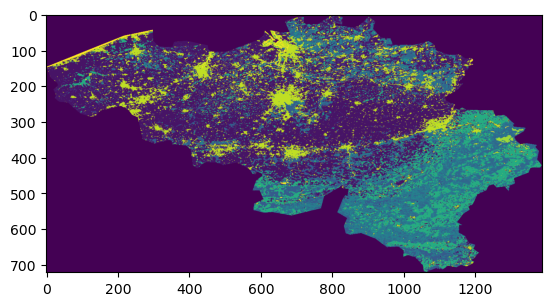

In [3]:
band = raster.read(1).astype(np.float64)
plt.imshow(band)
plt.show()

In [4]:
# Create Pixel objects for all pixels of the band
raster_lst = []
shape = band.shape
count = 0
for y, row in enumerate(band):
    for x, elt in enumerate(row):
        pix = pc.Pixel(X=x, Y=y, Cluster_value=elt, Group=None)
        raster_lst.append(pix)
        if elt == 0.0:
            count += 1
print(count)

495704


In [5]:
# Create raster object
Raster = rc.Raster(lst=raster_lst, shape=shape, groups=[], neighbours_diagonal=False)

In [6]:
# Group all pixels with value 0.0
n_groups, group_counter, group_sizes = Raster._group_raster(0.0)
n_groups, group_counter, group_sizes

(2,
 437,
 [495633,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  71,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [7]:
# Remove empty groups
Raster._remove_empty_groups()
Raster.n_groups, Raster.group_counter, Raster.group_sizes

(2, 2, [495633, 71])

In [8]:
# Group all pixels with value 40.0
n_groups, group_counter, group_sizes = Raster._group_raster(40.0)
n_groups, group_counter, group_sizes

(3091,
 3415,
 [495655,
  71,
  2,
  1,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  3,
  2,
  1,
  1,
  1,
  2,
  3,
  0,
  1,
  4,
  2,
  1,
  1,
  1,
  1,
  2,
  2,
  4,
  1,
  1,
  1,
  3,
  14,
  1,
  1,
  2,
  3,
  2,
  1,
  3,
  5,
  1,
  1,
  5,
  2,
  0,
  1,
  1,
  2,
  0,
  2,
  3,
  3,
  0,
  2,
  1,
  2,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  0,
  3,
  3,
  1,
  2,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  5,
  0,
  1,
  1,
  1,
  2,
  4,
  2,
  2,
  5,
  1,
  1,
  4,
  1,
  1,
  1,
  3,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  5,
  1,
  1,
  1,
  2,
  1,
  1,
  2,
  1,
  1,
  2,
  1,
  1,
  2,
  1,
  2,
  2,
  2,
  6,
  2,
  2,
  1,
  1,
  1,
  1,
  10,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  1,
  2,
  1,
  2,
  1,
  1,
  1,
  6,
  3,
  1,
  3,
  1,
  2,
  0,
  2,
  2,
  2,
  2,
  4,
  4,
  1,
  1,
  0,
  1,
  1,
  2,
  3,
  0,
  7,
  1,
  1,
  5,
  1,
  2,
  1,
  3,
  0,
  1,
  4,
  3,
  1,
  1,
  1,
  5,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  3

In [9]:
# Remove empty groups
Raster._remove_empty_groups()
Raster.n_groups, Raster.group_counter, Raster.group_sizes

(3091,
 3091,
 [495655,
  71,
  2,
  1,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  3,
  2,
  1,
  1,
  1,
  2,
  3,
  1,
  4,
  2,
  1,
  1,
  1,
  1,
  2,
  2,
  4,
  1,
  1,
  1,
  3,
  14,
  1,
  1,
  2,
  3,
  2,
  1,
  3,
  5,
  1,
  1,
  5,
  2,
  1,
  1,
  2,
  2,
  3,
  3,
  2,
  1,
  2,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  3,
  3,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  5,
  1,
  1,
  1,
  2,
  4,
  2,
  2,
  5,
  1,
  1,
  4,
  1,
  1,
  1,
  3,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  5,
  1,
  1,
  1,
  2,
  1,
  1,
  2,
  1,
  1,
  2,
  1,
  1,
  2,
  1,
  2,
  2,
  2,
  6,
  2,
  2,
  1,
  1,
  1,
  1,
  10,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  1,
  2,
  1,
  2,
  1,
  1,
  1,
  6,
  3,
  1,
  3,
  1,
  2,
  2,
  2,
  2,
  2,
  4,
  4,
  1,
  1,
  1,
  1,
  2,
  3,
  7,
  1,
  1,
  5,
  1,
  2,
  1,
  3,
  1,
  4,
  3,
  1,
  1,
  1,
  5,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  3,
  2,
  2,
  1,
  1,
  1,
  2,
  2,
  1,
  1,
  1,
  4,
  1

In [10]:
# Test _get_pixels_of_group function
group0 = Raster._get_pixels_of_group(0)
group0

 ...]

In [11]:
# Test _create_raster_array function
raster_array = Raster._create_raster_array()
raster_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(721, 1388))